In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from typing import *

# Linear Congruential Generator (LCG) Algorithm
The Linear Congruential Generator (LCG) is a simple algorithm used to generate a sequence of pseudo-random numbers. It is defined by the recurrence relation:

$$X_{n+1}=(aX_n+c) \ \ \ mod \ \ m$$

Where:

- $X_n$ is the current pseudo-random number in the sequence.\
- $X_{n+1}$ is the next pseudo-random number in the sequence.\
- a is the multiplier
- c is the increment
- m is the modulus

In [20]:
class RandomNumber:
    """
    This class implements a basic linear congruential generator (LCG), which is a simple algorithm
    to generate pseudo-random numbers. The generated sequence of numbers depends on the initial seed
    and the parameters `a`, `c`, and `m`.

    Attributes:
        seed (int): The initial seed value for the generator.
        a (int): Multiplier parameter for the LCG algorithm.
        c (int): Increment parameter for the LCG algorithm.
        m (int): Modulus parameter for the LCG algorithm.

    Methods:
        generate(): Generate a pseudo-random number between 0 and 1 using the LCG algorithm.
    """

    def __init__(self, seed, a, c, m):
        """
        Initialize the RandomNumber object with the given parameters.

        Args:
            seed (int): The initial seed value for the generator.
            a (int): Multiplier parameter for the LCG algorithm.
            c (int): Increment parameter for the LCG algorithm.
            m (int): Modulus parameter for the LCG algorithm.
        """
        self.state = seed
        self.a = a
        self.c = c
        self.m = m
        
    def generate(self):
        """
        Generate a pseudo-random number between 0 and 1 using the LCG algorithm.

        Returns:
            float: A pseudo-random number between 0 and 1.
        """
        self.state = (self.state * self.a + self.c) % self.m
        return self.state / self.m

    def uniform(self, n=1, low=0, high=1):
        """
        Generate a list of pseudo-random numbers between `low` and `high` using the LCG algorithm.

        Args:
            n (int): The number of random numbers to generate.
            low (float): The lower bound of the range (inclusive).
            high (float): The upper bound of the range (exclusive).

        Returns:
            list: A list of pseudo-random numbers between `low` and `high`.
        """
        if n==1:
            rn=low+(high-low)*self.generate()
            return rn
        else:
            random_numbers = []
            for _ in range(n):
                random_numbers.append(low + (high - low) * self.generate())
            return random_numbers
    

# Box-Muller transform
The Box-Muller transform is a method for generating pairs of independent, standard normally distributed (i.e., with mean 0 and standard deviation 1) random numbers from uniformly distributed random numbers. 

The transform is based on the polar form of the Box-Muller transformation, which uses the fact that if $U_1$ and $U_2$ are independent random variables uniformly distributed in the interval $[0,1)$, then the following transformation yields two independent random variables $Z_1$ and $Z_2$ that are standard normally distributed:

$$Z_1=\sqrt{-2ln(U_1)}cos(2 \pi U_2)$$
$$Z_2=\sqrt{-2ln(U_1)}sin(2 \pi U_2)$$

This is particularly valuable since many random number generators provide uniform distributions directly, but not necessarily normal distributions.

In [25]:
class RandomNumber:
    """
    This class implements a basic linear congruential generator (LCG), which is a simple algorithm
    to generate pseudo-random numbers. The generated sequence of numbers depends on the initial seed
    and the parameters `a`, `c`, and `m`.

    Attributes:
        seed (int): The initial seed value for the generator.
        a (int): Multiplier parameter for the LCG algorithm.
        c (int): Increment parameter for the LCG algorithm.
        m (int): Modulus parameter for the LCG algorithm.

    Methods:
        generate(): Generate a pseudo-random number between 0 and 1 using the LCG algorithm.
    """

    def __init__(self, seed, a=1103515245, c=12345, m=2**31):
        """
        Initialize the RandomNumber object with the given parameters.

        Args:
            seed (int): The initial seed value for the generator.
            a (int): Multiplier parameter for the LCG algorithm.
            c (int): Increment parameter for the LCG algorithm.
            m (int): Modulus parameter for the LCG algorithm.
        """
        self.state = seed
        self.a = a
        self.c = c
        self.m = m
        
    
    def generate(self):
        """
        Generate a pseudo-random number between 0 and 1 using the LCG algorithm.

        Returns:
            float: A pseudo-random number between 0 and 1.
        """
        self.state = (self.state * self.a + self.c) % self.m
        return self.state / self.m

    def uniform(self,low=0, high=1,n=1):
        """
        Generate a list of pseudo-random numbers between `low` and `high` using the LCG algorithm.

        Args:
            n (int): The number of random numbers to generate.
            low (float): The lower bound of the range (inclusive).
            high (float): The upper bound of the range (exclusive).

        Returns:
            list: A list of pseudo-random numbers between `low` and `high`.
        """
        random_numbers = []
        for _ in range(n):
            rn=low+(high-low)*self.generate()
            random_numbers.append(rn)
        if n==1:
            return random_numbers[0]
        else:
            return random_numbers
    
    def normal(self,mean=0, std=1,n=1):
        # Generate two random numbers from a uniform distribution
        random_numbers=[]
        for _ in range(n):
            U1 = self.uniform()
            U2 = self.uniform()

            # Box-Muller transform
            Z1 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
            # Z2 = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)

            # Apply mean and standard deviation
            X1 = mean + Z1 * std
            # X2 = mean + Z2 * std
            random_numbers.append(X1)
            # random_numbers.append(X2)
            
        if n==1:
            random_numbers[0]
        else:
            return random_numbers
    
    def poisson(self,lam,n=1):
        """
        Generate pseudo-random numbers from a Poisson distribution using the inverse transform sampling method.

        Args:
            lam (float): The lambda parameter of the Poisson distribution.
            n (int): The number of random numbers to generate.

        Returns:
            list: A list of pseudo-random numbers from a Poisson distribution.
        """
        def poisson_random(lam):
            # u = self.generate()
            u= self.uniform()
            k = 0
            p = np.exp(-lam)
            F = p

            while u > F:
                k += 1
                p *= lam / k
                F += p

            return k
        l=[]
        for i in range(n):
            l.append(poisson_random(lam))
        if n==1:
            return l[0]
        else:
            return l

# The Poisson Distribution with Inverse CDF

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. It is characterized by a single parameter $\lambda$, which represents the average rate of occurrences in that interval.



The Poisson distribution with parameter λ has the probability mass function(PMF):

$P(k;\lambda) = \frac{e^{-\lambda}\lambda^k}{k!}$

where:
- k is a non-negative integer representing the number of events occurring in the interval.

- $\lambda$ is the average rate of occurances.

# Inverse Transform Sampling Method:
Inverse Transform Sampling relies on the inversion of the cumulative distribution function (CDF). This means that if we have the CDF of a probability distribution, we can find its inverse, which allows us to generate random numbers by plugging uniformly distributed random numbers into the inverse CDF.

For the Poisson distribution, the cumulative distribution function (CDF) is defined as:

$F(k;\lambda) = \sum_{i=0}^k \frac{e^{-\lambda}\lambda^i}{i!}$

The CDF $F(k;\lambda)$ represents the probability that a Poisson-distributed random variable is less than or equal to k. As we increase k, the probability accumulates, starting from 0 and approaching 1.


## Algorithm to generate random numbers from uniform distribution.
- Generate a uniform random number u between 0 and 1.
- Find the smallest integer k such that $F(k;\lambda)\geq u$ will be our Poisson-distributed random variable.

What is $\textbf{u}$?

The uniform random number u selects a random point on the vertical axis of the CDF curve. This point represents a probability value between 0 and 1.

Why to find a smallest k?

We iteratively increase k until the condition $F(k;\lambda)\geq u$ is met. This ensures that we select the smallest k for which the cumulative probability exceeds or equals the selected probability u.

In [31]:
import math
import numpy as np

class RandomNumber:
    """
    This class implements a basic linear congruential generator (LCG), which is a simple algorithm
    to generate pseudo-random numbers. The generated sequence of numbers depends on the initial seed
    and the parameters `a`, `c`, and `m`.

    Attributes:
        seed (int): The initial seed value for the generator.
        a (int): Multiplier parameter for the LCG algorithm.
        c (int): Increment parameter for the LCG algorithm.
        m (int): Modulus parameter for the LCG algorithm.

    Methods:
        generate(): Generate a pseudo-random number between 0 and 1 using the LCG algorithm.
        uniform(low=0, high=1, n=1): Generate pseudo-random numbers from a uniform distribution.
        normal(mean=0, std=1, n=1): Generate pseudo-random numbers from a normal distribution.
        poisson(lam, n=1): Generate pseudo-random numbers from a Poisson distribution.
        geometric(p): Generate pseudo-random numbers from a geometric distribution.
    """

    def __init__(self, seed, a=1103515245, c=12345, m=2**31):
        """
        Initialize the RandomNumber object with the given parameters.

        Args:
            seed (int): The initial seed value for the generator.
            a (int): Multiplier parameter for the LCG algorithm.
            c (int): Increment parameter for the LCG algorithm.
            m (int): Modulus parameter for the LCG algorithm.
        """
        self.state = seed
        self.a = a
        self.c = c
        self.m = m
        
    
    def generate(self):
        """
        Generate a pseudo-random number between 0 and 1 using the LCG algorithm.

        Returns:
            float: A pseudo-random number between 0 and 1.
        """
        self.state = (self.state * self.a + self.c) % self.m
        return self.state / self.m

    def uniform(self, low=0, high=1, n=1):
        """
        Generate a list of pseudo-random numbers between `low` and `high` using the LCG algorithm.

        Args:
            n (int): The number of random numbers to generate.
            low (float): The lower bound of the range (inclusive).
            high (float): The upper bound of the range (exclusive).

        Returns:
            list: A list of pseudo-random numbers between `low` and `high`.
        """
        random_numbers = []
        for _ in range(n):
            rn = low + (high - low) * self.generate()
            random_numbers.append(rn)
        if n == 1:
            return random_numbers[0]
        else:
            return random_numbers
    
    def geometric(self, p, n=1):
        """
        Generate pseudo-random numbers from a geometric distribution using the inverse transform sampling method.

        Args:
            p (float): The probability of success.
            n (int): The number of random numbers to generate.

        Returns:
            list: A list of pseudo-random numbers from a geometric distribution.
        """
        def geometric_random(p):
            u = self.generate()
            return math.ceil(math.log(1 - u) / math.log(1 - p))
        
        random_numbers = []
        for _ in range(n):
            random_numbers.append(geometric_random(p))
        
        if n == 1:
            return random_numbers[0]
        else:
            return random_numbers

# Geometric Distribution
In probability theory, the geometric distribution models the number of trials needed until the first success in a sequence of independent Bernoulli trials.

The probability mass function (PMF) of the geometric distribution is given by:
$P(X=k) = (1-p)^{k-1} * p$

where p is the probability of success on each trial, and k=1,2,3,... represents the number of trials until the first success.

## Inverse Transform Sampling on Geometric Distribution:

- Inverse Transform sampling is a method used to generate random numbers from a given probability distribution by transforming uniform random variables.
- The cumulative distribution function(CDF) of the geometric distribution is:
$F(x) = 1 - (1-p)^x$
where x is the number of trials until the first success.

To generate a random variable from the geometric distribution using inverse transform sampling, we first generate a uniform random variable U between 0 and 1, and then solve for x such that:

$U=F(x)=1-(1-p)^x$
Solving for x, we get:
$x=\frac{log(1-U)}{log(1-p)}$

where U is a uniform random variable.

In [43]:

# Example usage:
# Initialize the random number generator
rng = RandomNumber(seed=43)

# Generate a random number from a geometric distribution with p=0.3
geo_number = rng.geometric(p=0.2)
print("Geometric Random Number:", geo_number)

# Generate a list of 5 random numbers from a geometric distribution with p=0.3
geo_numbers = rng.geometric(p=0.3, n=10)
print("Geometric Random Numbers:", geo_numbers)

Geometric Random Number: 1
Geometric Random Numbers: [1, 2, 3, 1, 4, 3, 2, 4, 3, 7]


In [64]:
rng.geometric(p=0.1,n=10)

[5, 16, 7, 10, 6, 12, 38, 6, 2, 6]

In [26]:
rng = RandomNumber(seed=1234)

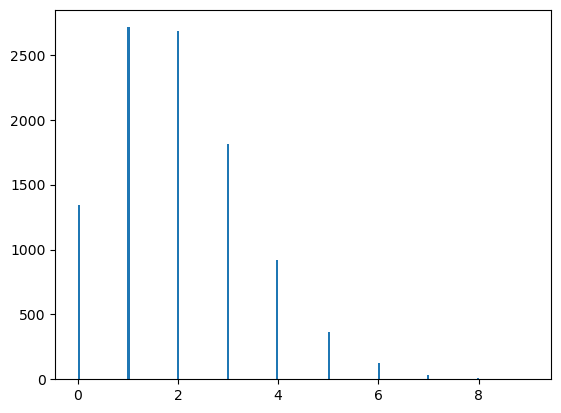

In [29]:
plt.hist(rng.poisson_random(2,10000),bins=200)
plt.show()

In [7]:
import numpy as np

(array([1.84370e+04, 7.31340e+04, 0.00000e+00, 1.46437e+05, 1.95121e+05,
        0.00000e+00, 1.95426e+05, 1.55888e+05, 0.00000e+00, 1.04672e+05,
        0.00000e+00, 5.96480e+04, 2.98610e+04, 0.00000e+00, 1.32240e+04,
        5.25700e+03, 0.00000e+00, 1.92400e+03, 6.79000e+02, 0.00000e+00,
        2.08000e+02, 0.00000e+00, 5.20000e+01, 2.30000e+01, 0.00000e+00,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.        ,  0.63333333,  1.26666667,  1.9       ,  2.53333333,
         3.16666667,  3.8       ,  4.43333333,  5.06666667,  5.7       ,
         6.33333333,  6.96666667,  7.6       ,  8.23333333,  8.86666667,
         9.5       , 10.13333333, 10.76666667, 11.4       , 12.03333333,
        12.66666667, 13.3       , 13.93333333, 14.56666667, 15.2       ,
        15.83333333, 16.46666667, 17.1       , 17.73333333, 18.36666667,
        19.        ]),
 <BarContainer object of 30 artists>)

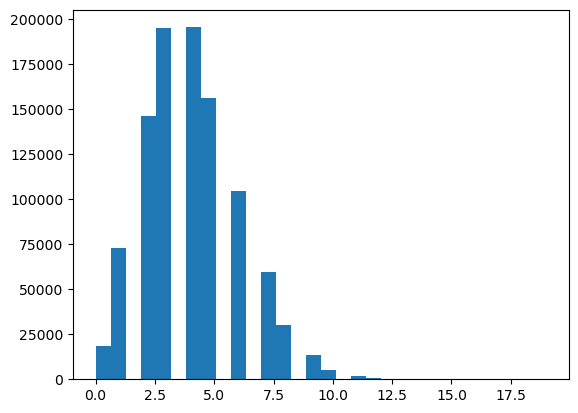

In [8]:
plt.hist(np.random.poisson(lam=4,size=1000000),bins=30)

In [9]:
import numpy as np

def poisson_random(lam):
    u = np.random.rand()
    k = 0
    p = np.exp(-lam)
    F = p
    
    while u > F:
        k += 1
        p *= lam / k
        F += p
    
    return k

# Example usage
lambda_value = 3.0  # Adjust as per your requirement
random_number = poisson_random(lambda_value)
print("Random number from Poisson distribution:", random_number)

Random number from Poisson distribution: 4


In [14]:
l=[]
for _ in range(1000000):
    rn=poisson_random(10)
    l.append(rn)

(array([1.21428571e-04, 0.00000000e+00, 0.00000000e+00, 1.67857143e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.38928571e-03,
        0.00000000e+00, 0.00000000e+00, 2.75892857e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.67892857e-02, 0.00000000e+00,
        0.00000000e+00, 1.35978571e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.25721429e-01, 0.00000000e+00, 0.00000000e+00,
        3.21910714e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.02860714e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.46385714e-01, 0.00000000e+00, 0.00000000e+00, 4.46435714e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05217857e-01,
        0.00000000e+00, 0.00000000e+00, 3.39292857e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.59185714e-01, 0.00000000e+00,
        0.00000000e+00, 1.84682143e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.24128571e-01, 0.00000000e+00, 0.000000

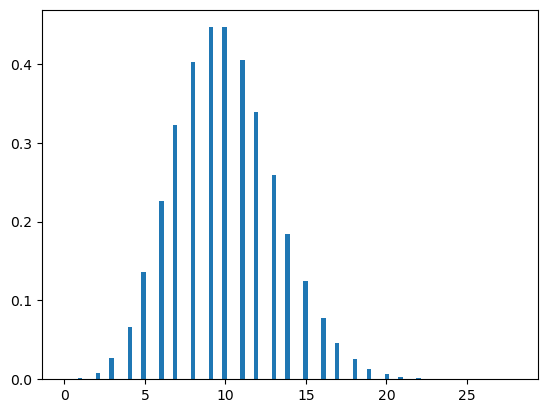

In [16]:
plt.hist(l,bins=100,density=True)